# Assignment: MULTIPLE LINEAR REGRESSION

In [463]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [179]:
df = pd.read_csv("ToyotaCorolla - MLR.csv") #read the data

In [180]:
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [181]:
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [182]:
df.tail()

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [184]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [185]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [186]:
df.shape

(1436, 11)

In [187]:
df.isnull().sum() ## display no.of null values in each column

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [188]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [189]:
df[df.duplicated()]

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
113  24950          8  13253    Diesel  116          0  2000      5   

     Cylinders  Gears  Weight  
113          4      5    1320

In [190]:
df1= df.drop_duplicates() ##remove duplicated rows and save in new var.df1

In [191]:
df1

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1435 rows x 11 columns]

In [192]:
df1[df1.duplicated()] #print duplicated rows

Empty DataFrame
Columns: [Price, Age_08_04, KM, Fuel_Type, HP, Automatic, cc, Doors, Cylinders, Gears, Weight]
Index: []

In [193]:
# remove duplicated rows and save in new var.df1

In [194]:
# After removing duplicated rows from the dataset, now we can treat null values using imputation technique. Imputation technique is used for replacing the missing data with some subtitle values to retain most of the data/information of the dataset. These subtitle values can be either mean, vmedian or mode.Let treat null values of some columns using mean,some columns using median and some columns using mode.
# We can treat null values of columns: Price, Age_08_04, KM, HP, Automatic,	cc,	Doors, Cylinders, Gears, Weight using mean

In [195]:
df['Price'].mean()

10730.824512534818

In [196]:
df['Price'].median()

9900.0

In [197]:
df['Price'].mode()

0    8950
Name: Price, dtype: int64

In [198]:
df['Price'].std()

3626.9645849102394

In [199]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [200]:
df['Age_08_04'].mean()

55.94707520891365

In [201]:
df['Age_08_04'].median()

61.0

In [202]:
df['Age_08_04'].mode()

0    68
Name: Age_08_04, dtype: int64

In [203]:
df['Age_08_04'].std()

18.59998834280617

In [204]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [205]:
df['KM'].mean()

68533.25974930362

In [206]:
df['KM'].median()

63389.5

In [207]:
df['KM'].mode()

0    36000
Name: KM, dtype: int64

In [208]:
df['KM'].std()

37506.44887218956

In [209]:
df['HP'].mean()

101.50208913649026

In [210]:
df['HP'].median()

110.0

In [211]:
df['HP'].mode()

0    110
Name: HP, dtype: int64

In [212]:
df['HP'].std()

14.981079675567704

In [213]:
df['Automatic'].mean()

0.055710306406685235

In [214]:
df['Automatic'].median()

0.0

In [215]:
df['Automatic'].mode()

0    0
Name: Automatic, dtype: int64

In [216]:
df['Automatic'].std()

0.22944133861584276

In [217]:
df['cc'].mean()

1576.8558495821726

In [218]:
df['cc'].median()

1600.0

In [219]:
df['cc'].mode()

0    1600
Name: cc, dtype: int64

In [220]:
df['cc'].std()

424.3867698523175

In [221]:
df['Doors'].mean()

4.0334261838440115

In [222]:
df['Doors'].median()

4.0

In [223]:
df['Doors'].mode()

0    5
Name: Doors, dtype: int64

In [224]:
df['Doors'].std()

0.9526766046325805

In [225]:
df['Cylinders'].mean()

4.0

In [226]:
df['Cylinders'].median()

4.0

In [227]:
df['Cylinders'].mode()

0    4
Name: Cylinders, dtype: int64

In [228]:
df['Cylinders'].std()

0.0

In [229]:
df['Gears'].mean()

5.0264623955431755

In [230]:
df['Gears'].median()

5.0

In [231]:
df['Gears'].mode()

0    5
Name: Gears, dtype: int64

In [232]:
df['Gears'].std()

0.18851044383559556

In [233]:
df['Weight'].mean()

1072.4596100278552

In [234]:
df['Weight'].median()

1070.0

In [235]:
df['Weight'].mode()

0    1075
Name: Weight, dtype: int64

In [236]:
df['Weight'].std()

52.6411204869316

In [237]:
# Outlier Detection
# Histogram
# Boxplot
# Descriptive Statistics

In [238]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

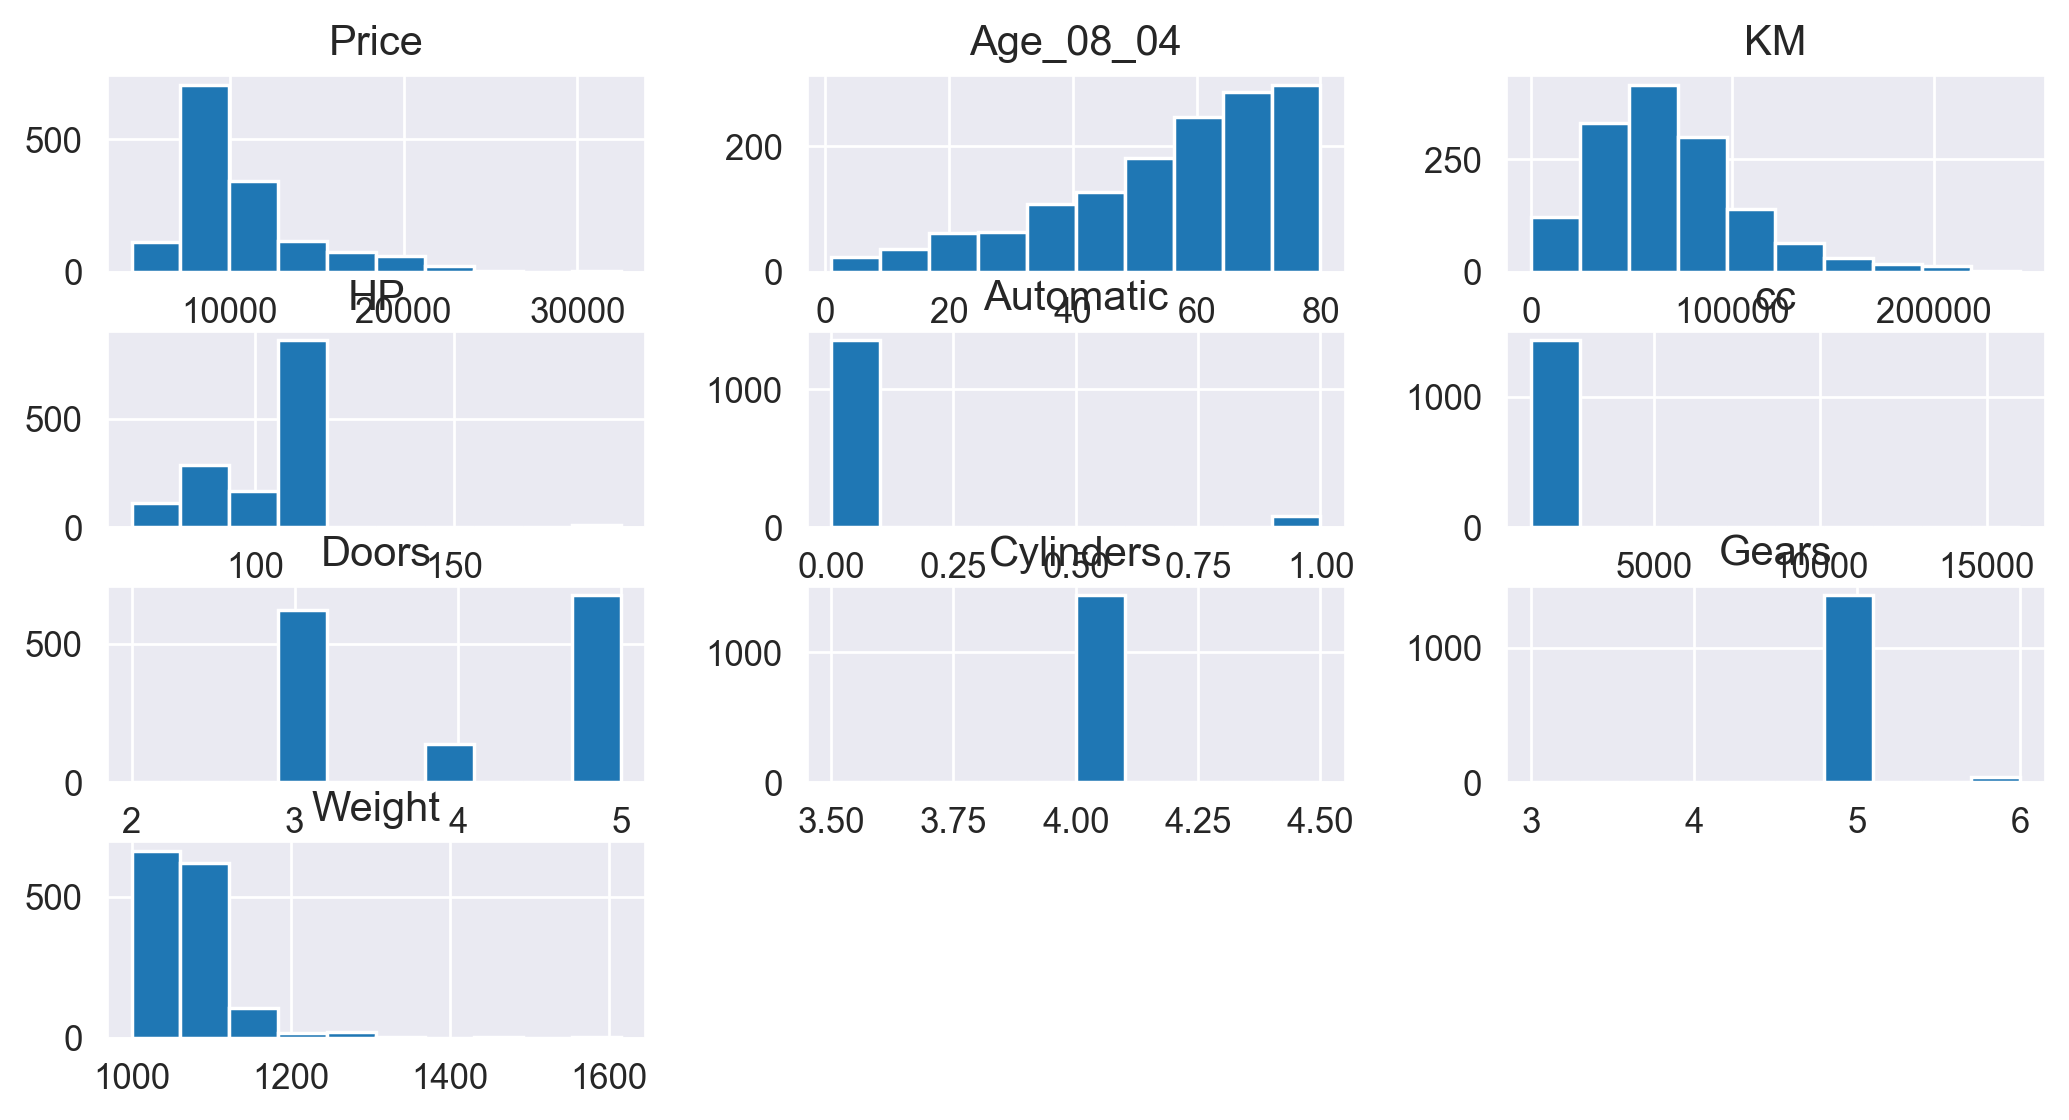

In [239]:
df.hist()

<Axes: >

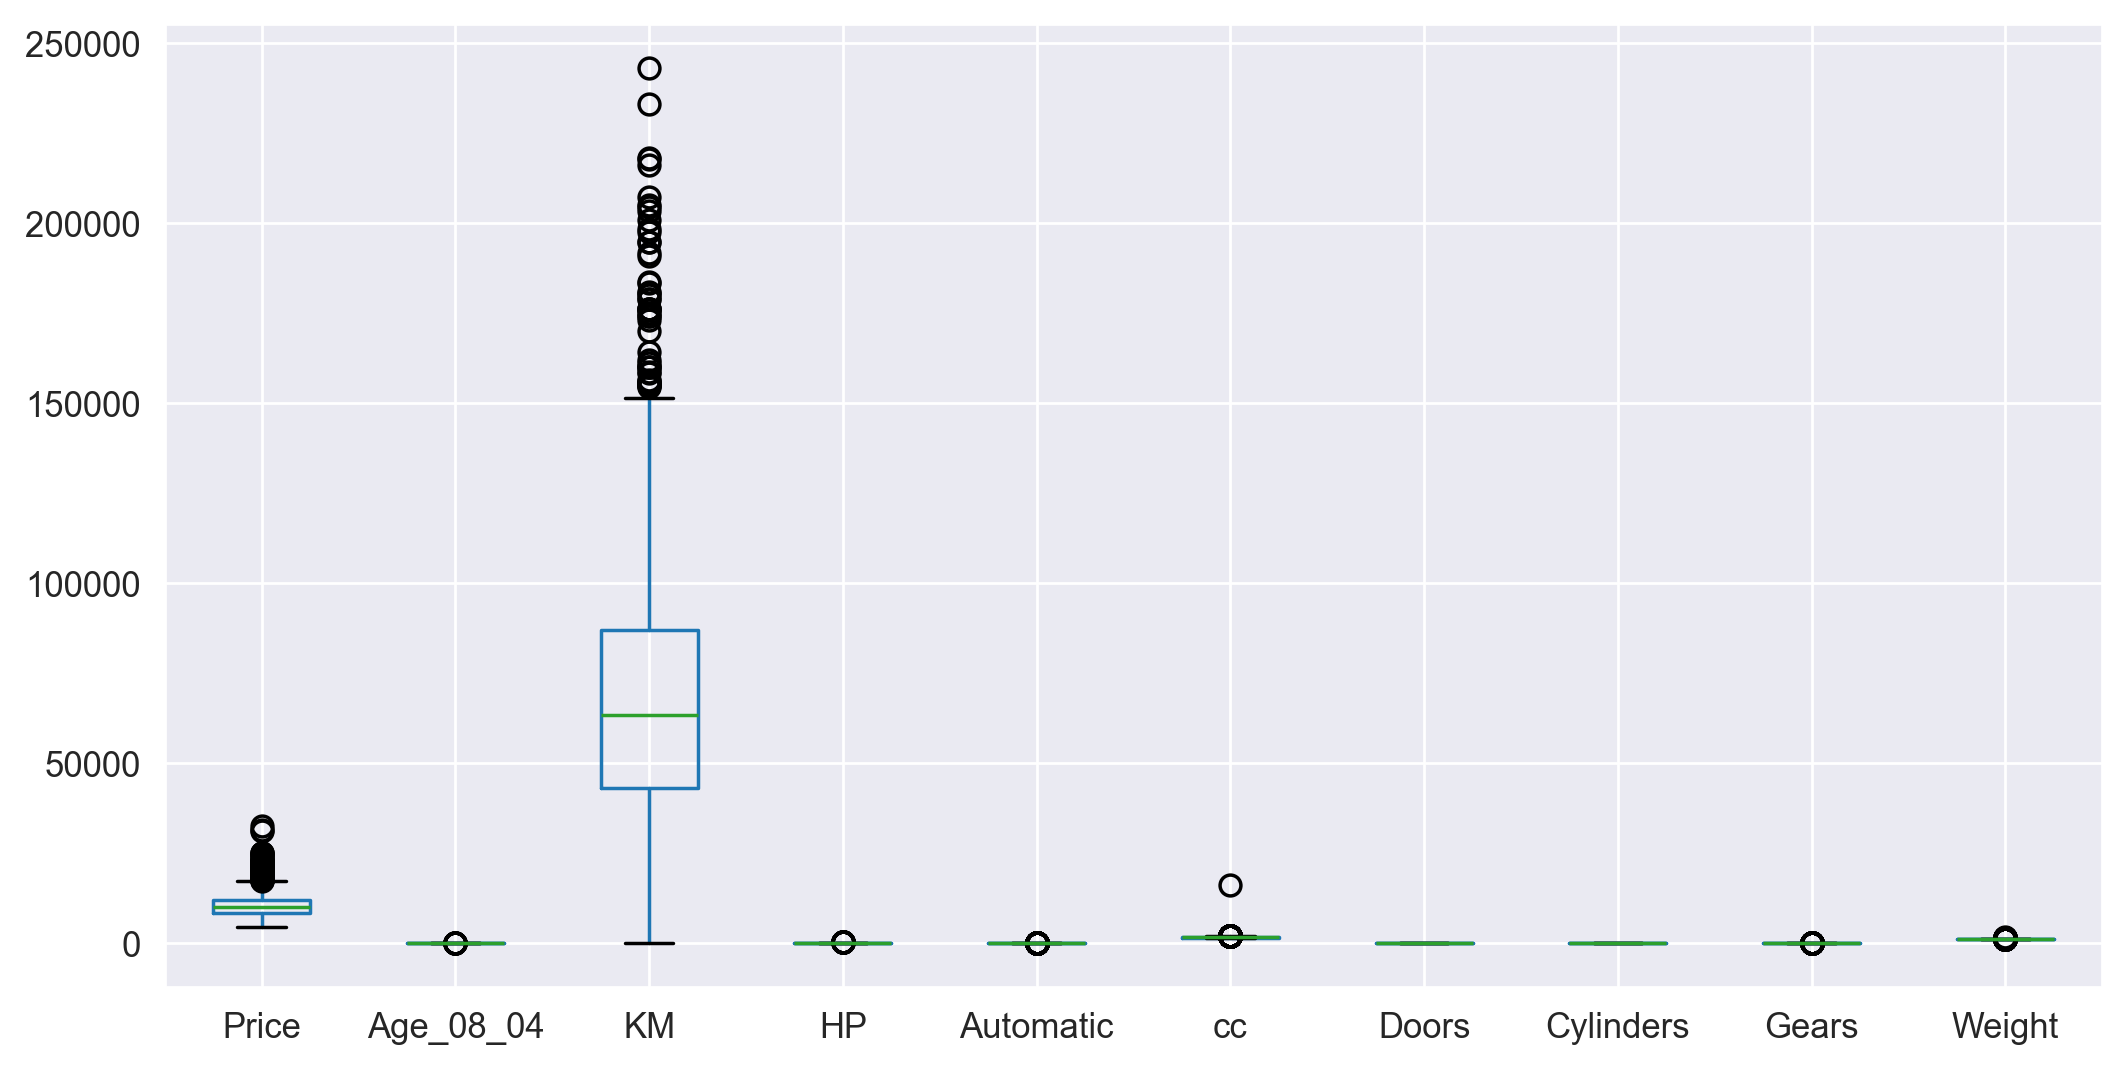

In [240]:
df.boxplot()

<Axes: xlabel='KM'>

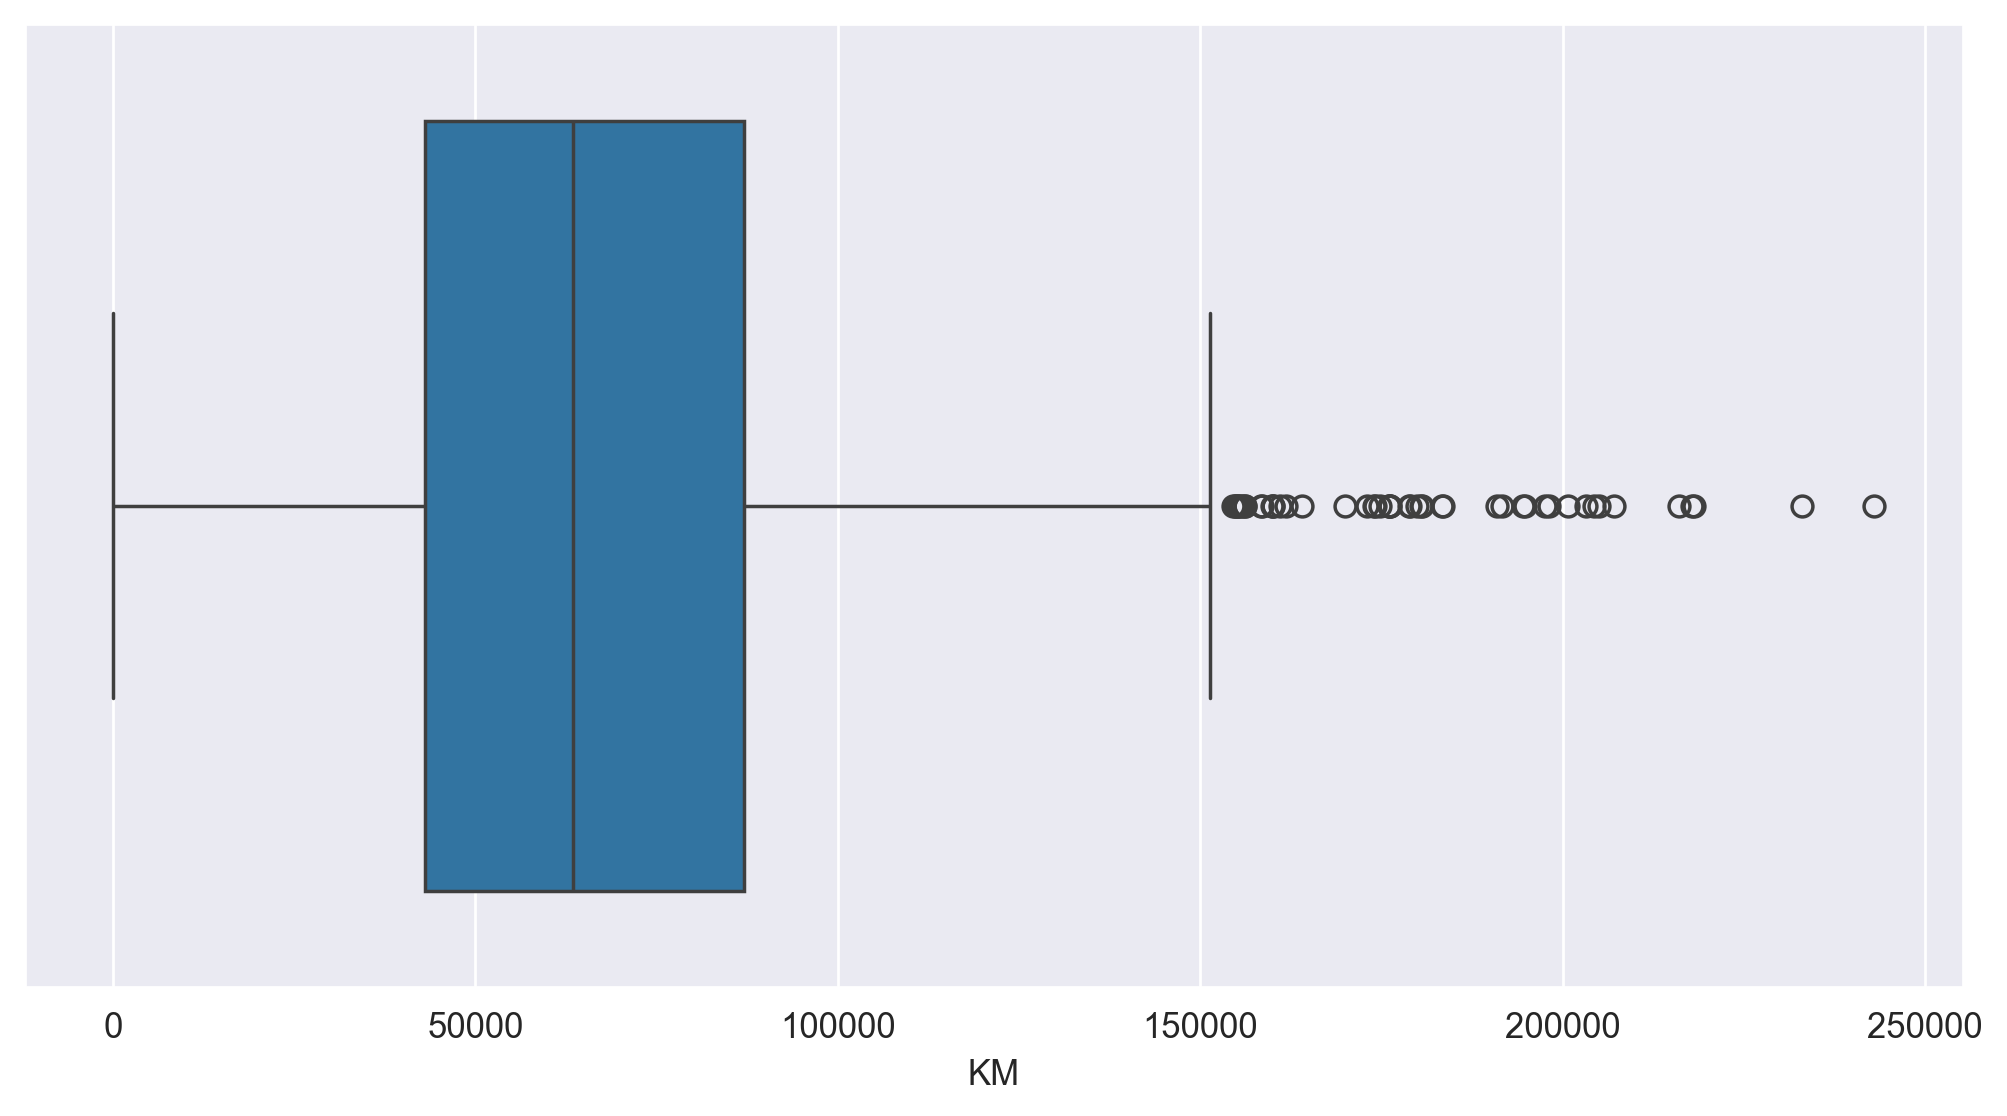

In [241]:
sns.boxplot(x= df['KM'])

In [242]:
df['KM'].quantile(0.50) #lower quartile: q1

63389.5

In [243]:
df['KM'].quantile(0.15) #Uppeer quartile: q3

32555.75

In [244]:
# Outlier Detection: User defined Function to calculate Upper Extreme and Lower Extreme value
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.50)
  q3 = data[colname].quantile(0.15)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3
  

In [245]:
outlier_detection(df, 'KM')

(109640.125, -13694.875, 63389.5, 32555.75)

In [246]:
outlier_detection(df, 'cc')

(2050.0, 850.0, 1600.0, 1300.0)

In [247]:
import plotly.express as pe

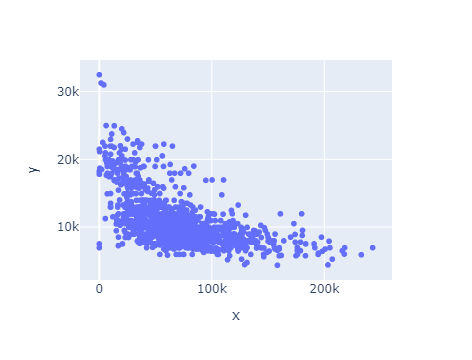

In [248]:
pe.scatter(x = df['KM'], y = df['Price'])

In [249]:
#Scatter plot

In [250]:
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

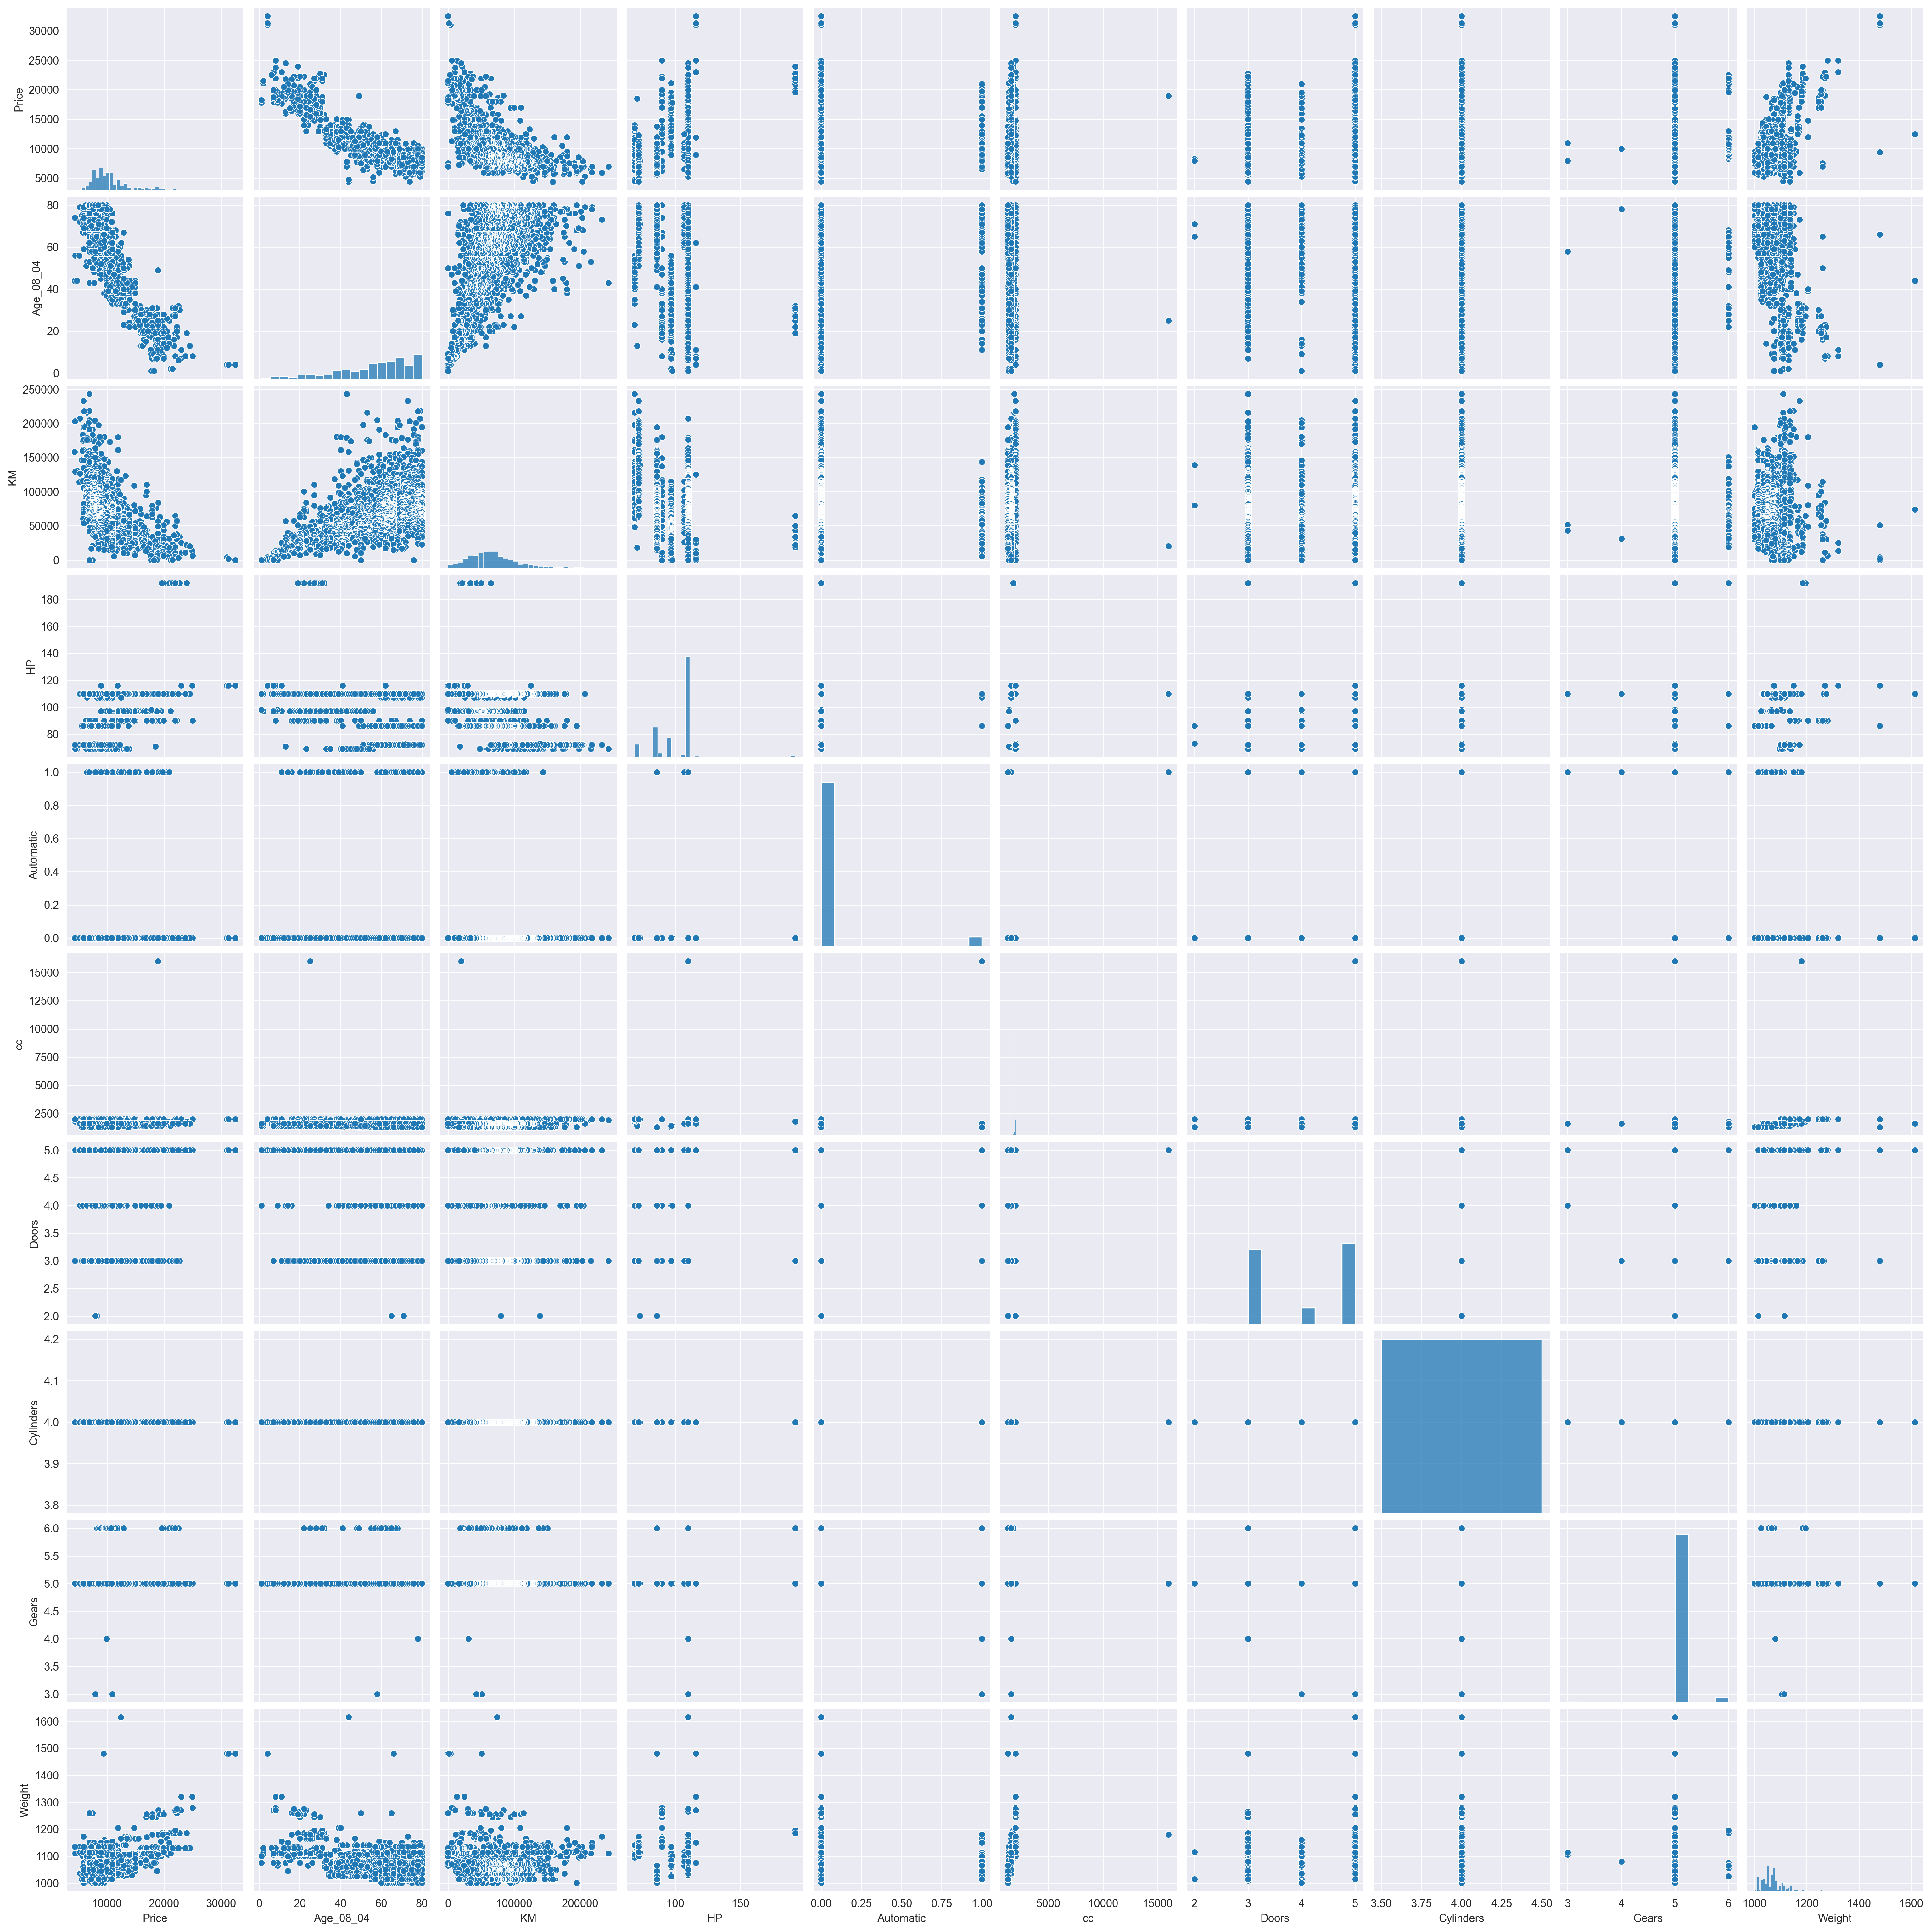

In [251]:
sns.pairplot(df) # relationship between all nemerical columns

<Axes: >

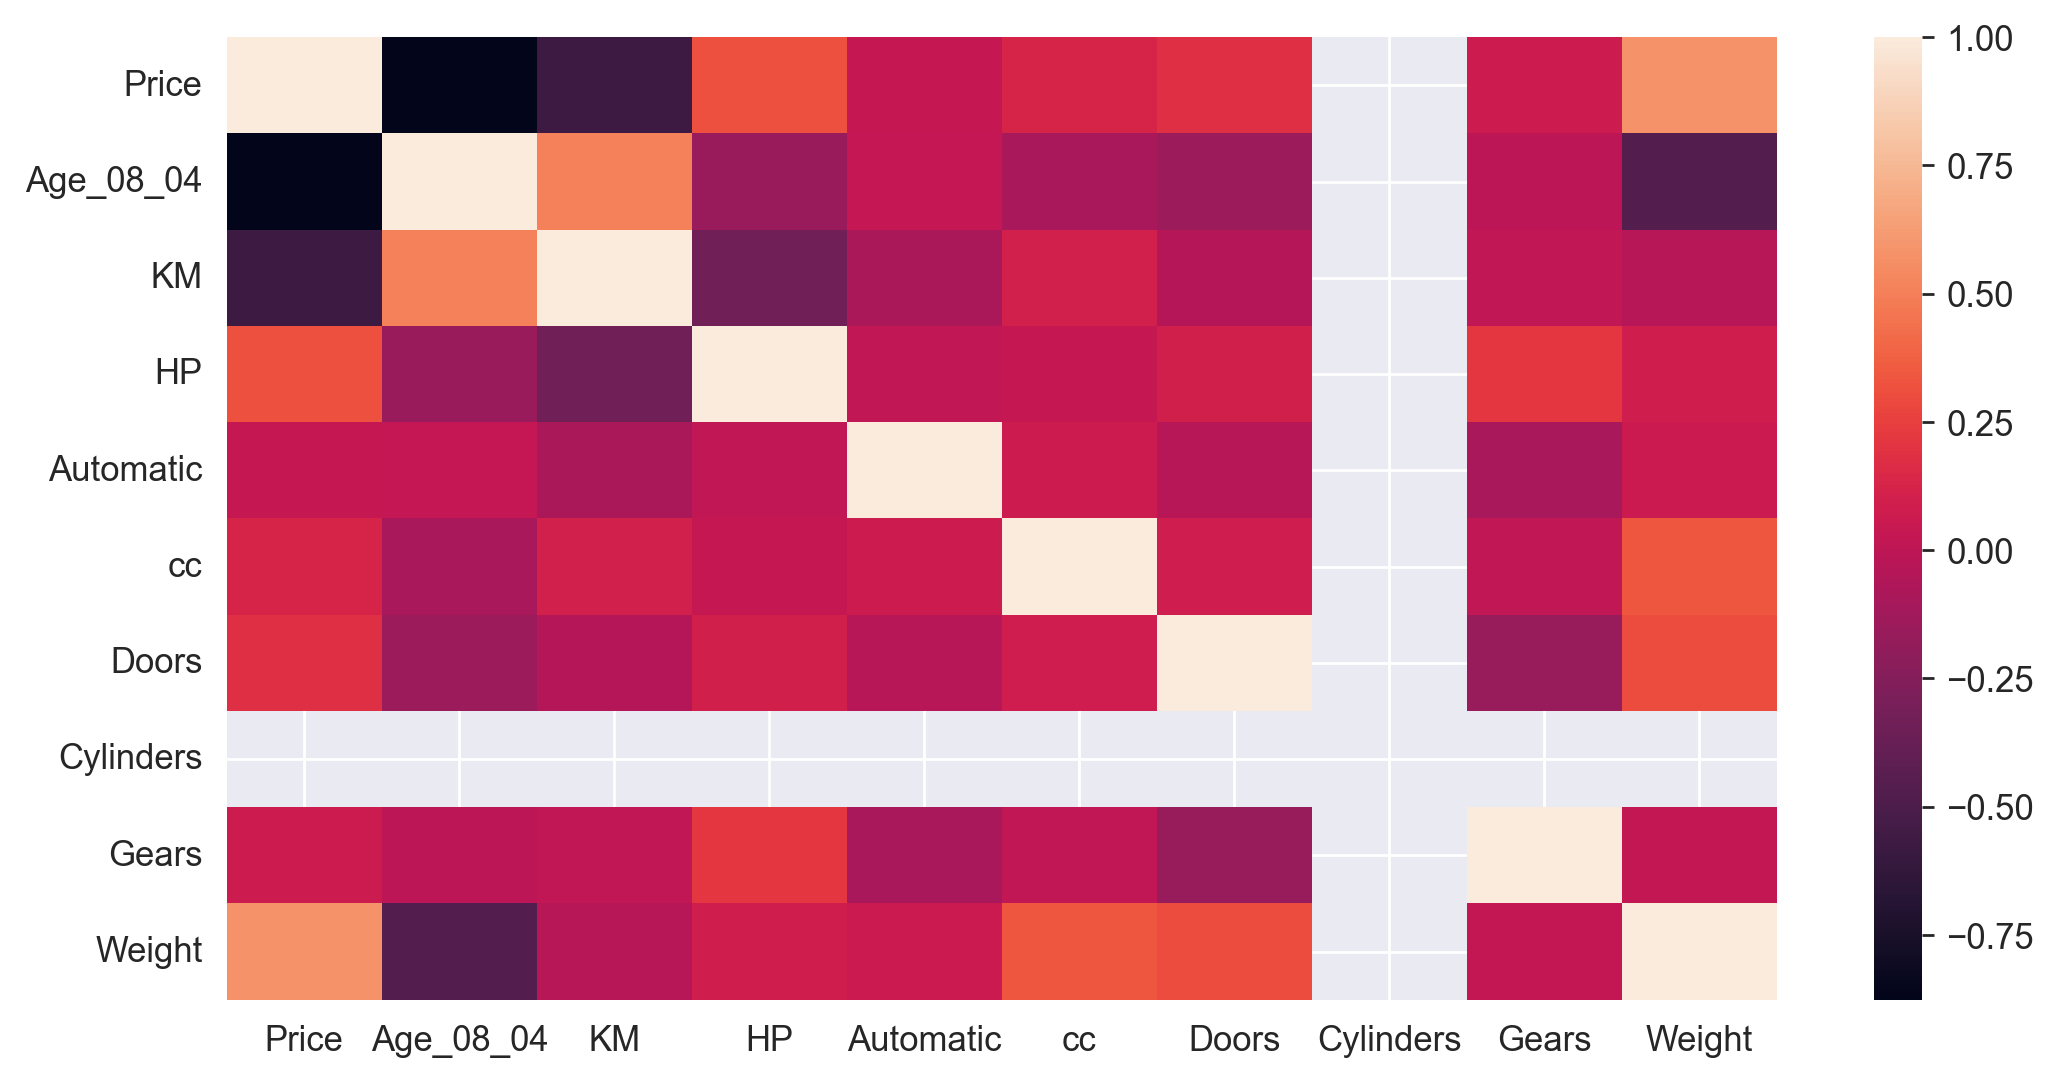

In [252]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: >

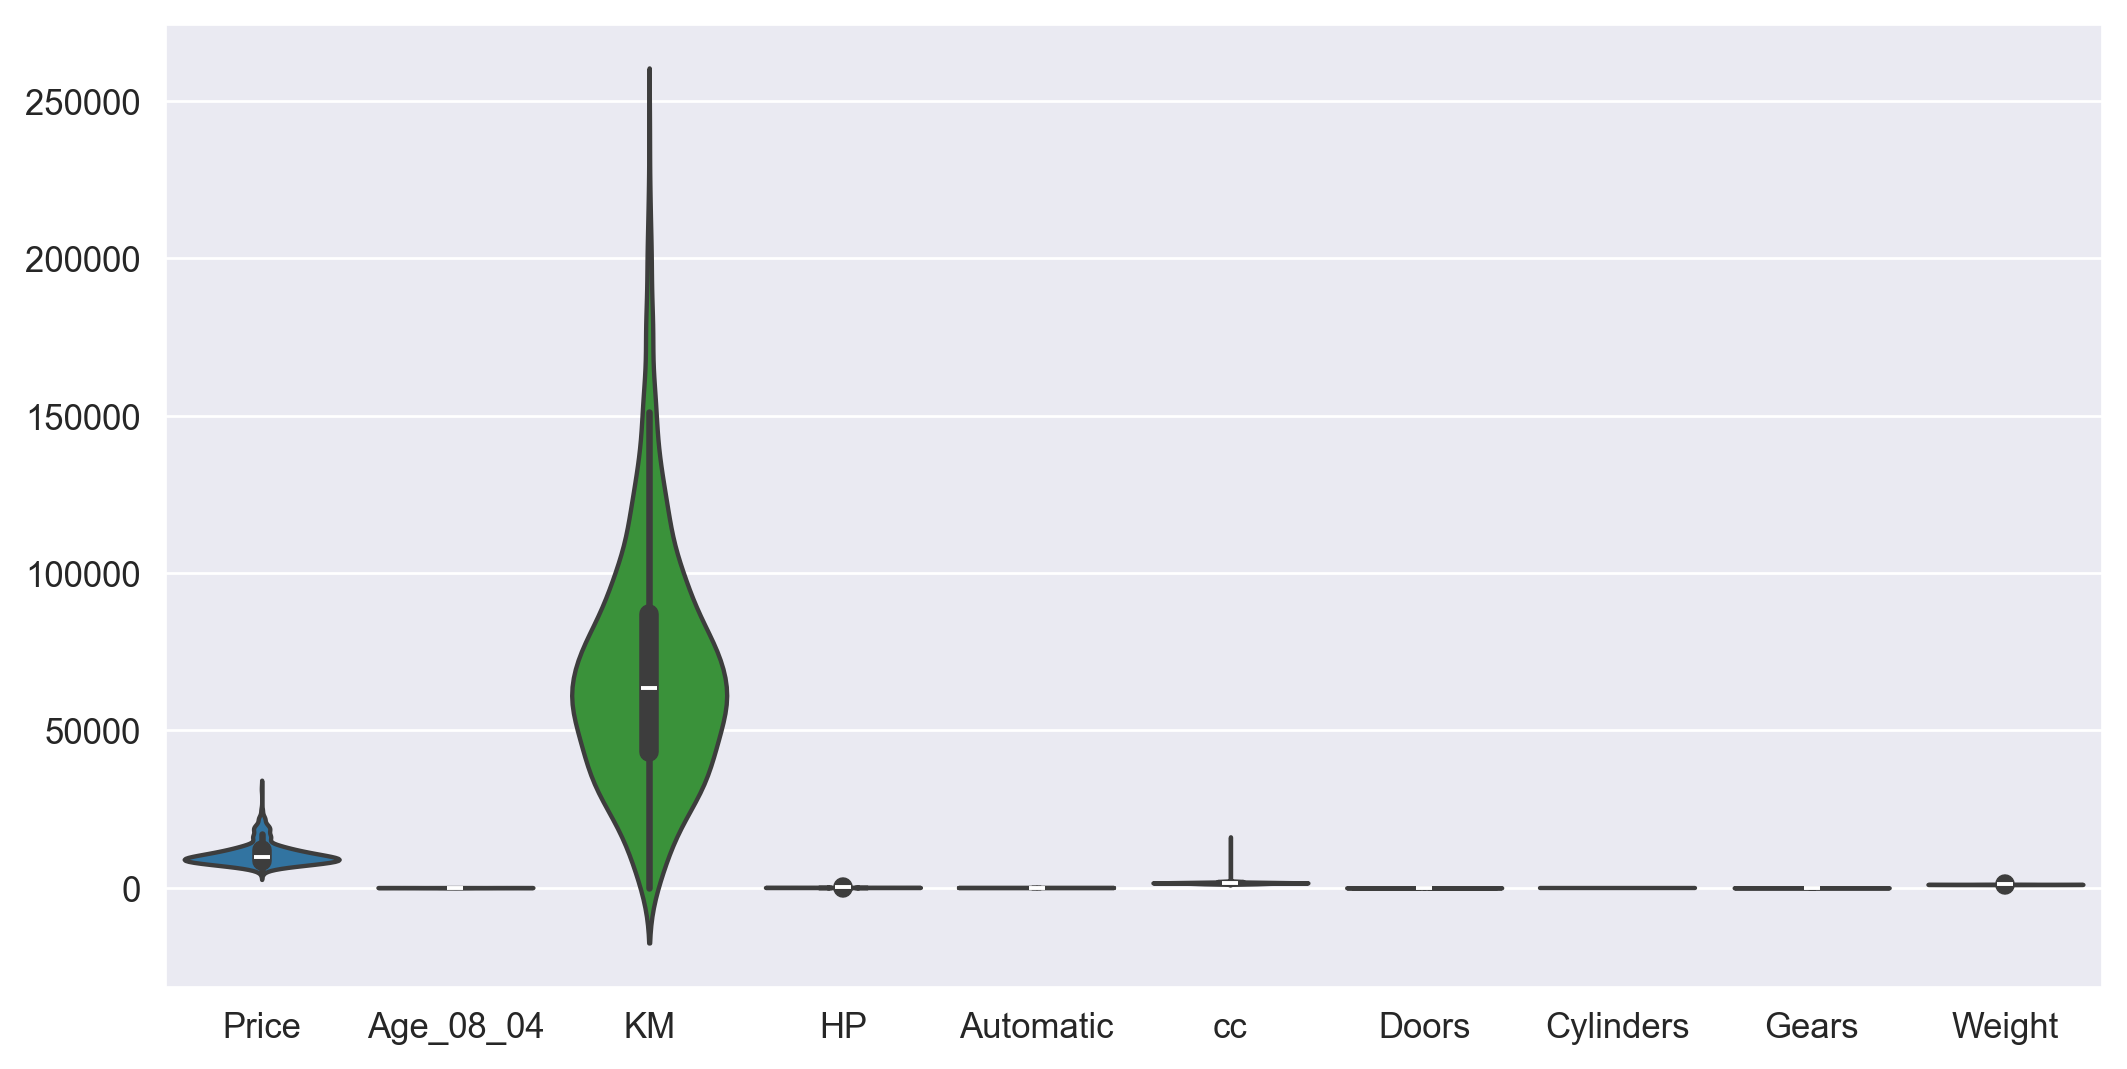

In [253]:
sns.violinplot(df)

# MODEL BUILDING

In [255]:
import statsmodels.formula.api as smf

In [256]:
model=smf.ols('Age_08_04~Price+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=df).fit()

In [257]:
model.params

Intercept     2.812990
Price        -0.004910
KM            0.000007
HP            0.168330
Automatic     5.069088
cc           -0.000566
Doors         0.049654
Cylinders    11.251961
Gears         3.127311
Weight        0.026080
dtype: float64

In [258]:
model.pvalues

Intercept     1.045798e-08
Price        1.214440e-289
KM            4.316036e-01
HP            2.167812e-23
Automatic     3.728598e-07
cc            3.182135e-01
Doors         8.443517e-01
Cylinders     1.045798e-08
Gears         1.277205e-02
Weight        3.442150e-05
dtype: float64

# LINEAR REGRESSION

In [260]:
#Weight
wt= smf.ols('Age_08_04~Weight+Price+HP', data=df).fit()
wt.pvalues

Intercept    7.901016e-27
Weight       1.695105e-07
Price        0.000000e+00
HP           1.053400e-26
dtype: float64

In [261]:
#Automatic
at= smf.ols('Age_08_04~KM+Price+HP', data=df).fit()
at.pvalues

Intercept    3.425984e-257
KM            7.333761e-03
Price         0.000000e+00
HP            2.249489e-25
dtype: float64

# Calculate VIF(Variance influence factor)

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [264]:
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [265]:
data= df.drop(columns=['Age_08_04'])
data

Price     KM Fuel_Type   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500  46986    Diesel   90          0  2000      3          4      5   
1     13750  72937    Diesel   90          0  2000      3          4      5   
2     13950  41711    Diesel   90          0  2000      3          4      5   
3     14950  48000    Diesel   90          0  2000      3          4      5   
4     13750  38500    Diesel   90          0  2000      3          4      5   
...     ...    ...       ...  ...        ...   ...    ...        ...    ...   
1431   7500  20544    Petrol   86          0  1300      3          4      5   
1432  10845  19000    Petrol   86          0  1300      3          4      5   
1433   8500  17016    Petrol   86          0  1300      3          4      5   
1434   7250  16916    Petrol   86          0  1300      3          4      5   
1435   6950      1    Petrol  110          0  1600      5          4      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1431    1025  
1432    1015  
1433    1015  
1434    1015  
1435    1114  

[1436 rows x 10 columns]

# List Comprehension

In [267]:
lst = []

for i in range(1,10):
    lst.append(i*2)

In [268]:
type(lst)
lst

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [269]:
lst_com = [i*2 for i in range(1,10)]
type(lst_com)
lst_com

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [270]:
sqr = [i**2 for i in range(1,26)]
sqr

[1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625]

In [271]:
data

Price     KM Fuel_Type   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500  46986    Diesel   90          0  2000      3          4      5   
1     13750  72937    Diesel   90          0  2000      3          4      5   
2     13950  41711    Diesel   90          0  2000      3          4      5   
3     14950  48000    Diesel   90          0  2000      3          4      5   
4     13750  38500    Diesel   90          0  2000      3          4      5   
...     ...    ...       ...  ...        ...   ...    ...        ...    ...   
1431   7500  20544    Petrol   86          0  1300      3          4      5   
1432  10845  19000    Petrol   86          0  1300      3          4      5   
1433   8500  17016    Petrol   86          0  1300      3          4      5   
1434   7250  16916    Petrol   86          0  1300      3          4      5   
1435   6950      1    Petrol  110          0  1600      5          4      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1431    1025  
1432    1015  
1433    1015  
1434    1015  
1435    1114  

[1436 rows x 10 columns]

In [272]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [273]:
data.columns

Index(['Price', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [274]:
vif['Features'] = data.columns
vif

Features
0      Price
1         KM
2  Fuel_Type
3         HP
4  Automatic
5         cc
6      Doors
7  Cylinders
8      Gears
9     Weight

In [275]:
len(data.columns)

10

In [276]:
range(len(data.columns))

range(0, 10)

In [277]:
data

Price     KM Fuel_Type   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500  46986    Diesel   90          0  2000      3          4      5   
1     13750  72937    Diesel   90          0  2000      3          4      5   
2     13950  41711    Diesel   90          0  2000      3          4      5   
3     14950  48000    Diesel   90          0  2000      3          4      5   
4     13750  38500    Diesel   90          0  2000      3          4      5   
...     ...    ...       ...  ...        ...   ...    ...        ...    ...   
1431   7500  20544    Petrol   86          0  1300      3          4      5   
1432  10845  19000    Petrol   86          0  1300      3          4      5   
1433   8500  17016    Petrol   86          0  1300      3          4      5   
1434   7250  16916    Petrol   86          0  1300      3          4      5   
1435   6950      1    Petrol  110          0  1600      5          4      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1431    1025  
1432    1015  
1433    1015  
1434    1015  
1435    1114  

[1436 rows x 10 columns]

In [278]:
vif

Features
0      Price
1         KM
2  Fuel_Type
3         HP
4  Automatic
5         cc
6      Doors
7  Cylinders
8      Gears
9     Weight

# Subset Selection

In [280]:
#Weight
wt= smf.ols('Age_08_04~Weight+Price+HP', data=df).fit()
wt.rsquared

0.7883459112909788

In [281]:
#Automatic
at= smf.ols('Age_08_04~KM+Price+HP', data=df).fit()
at.rsquared

0.7853435417535529

In [282]:
at.pvalues

Intercept    3.425984e-257
KM            7.333761e-03
Price         0.000000e+00
HP            2.249489e-25
dtype: float64

# MODEL VALIDATION TECHNIQUES

In [284]:
# 1. Residual Analysis

In [285]:
# Normality Test

In [286]:
model=smf.ols('Age_08_04~Price+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=df).fit()
model.rsquared

0.7928389317575962

In [287]:
#Statsmodel
import statsmodels.api as sm

In [288]:
df.head(5)

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [289]:
model.fittedvalues

0       42.028562
1       40.972384
2       39.784054
3       34.915229
4       40.875319
          ...    
1431    67.387544
1432    50.691368
1433    62.193072
1434    68.330370
1435    76.243219
Length: 1436, dtype: float64

In [290]:
model.params

Intercept     2.812990
Price        -0.004910
KM            0.000007
HP            0.168330
Automatic     5.069088
cc           -0.000566
Doors         0.049654
Cylinders    11.251961
Gears         3.127311
Weight        0.026080
dtype: float64

In [291]:
model.resid

0      -19.028562
1      -17.972384
2      -15.784054
3       -8.915229
4      -10.875319
          ...    
1431     1.612456
1432    21.308632
1433     8.806928
1434     1.669630
1435    -0.243219
Length: 1436, dtype: float64

In [292]:
np.argmax(model.resid), np.max(model.resid)

(109, 42.887572184308965)

# 2. Residual plot of Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [294]:
model.fittedvalues

0       42.028562
1       40.972384
2       39.784054
3       34.915229
4       40.875319
          ...    
1431    67.387544
1432    50.691368
1433    62.193072
1434    68.330370
1435    76.243219
Length: 1436, dtype: float64

In [295]:
model.resid #error

0      -19.028562
1      -17.972384
2      -15.784054
3       -8.915229
4      -10.875319
          ...    
1431     1.612456
1432    21.308632
1433     8.806928
1434     1.669630
1435    -0.243219
Length: 1436, dtype: float64

Text(0.5, 1.0, 'Constant Variance')

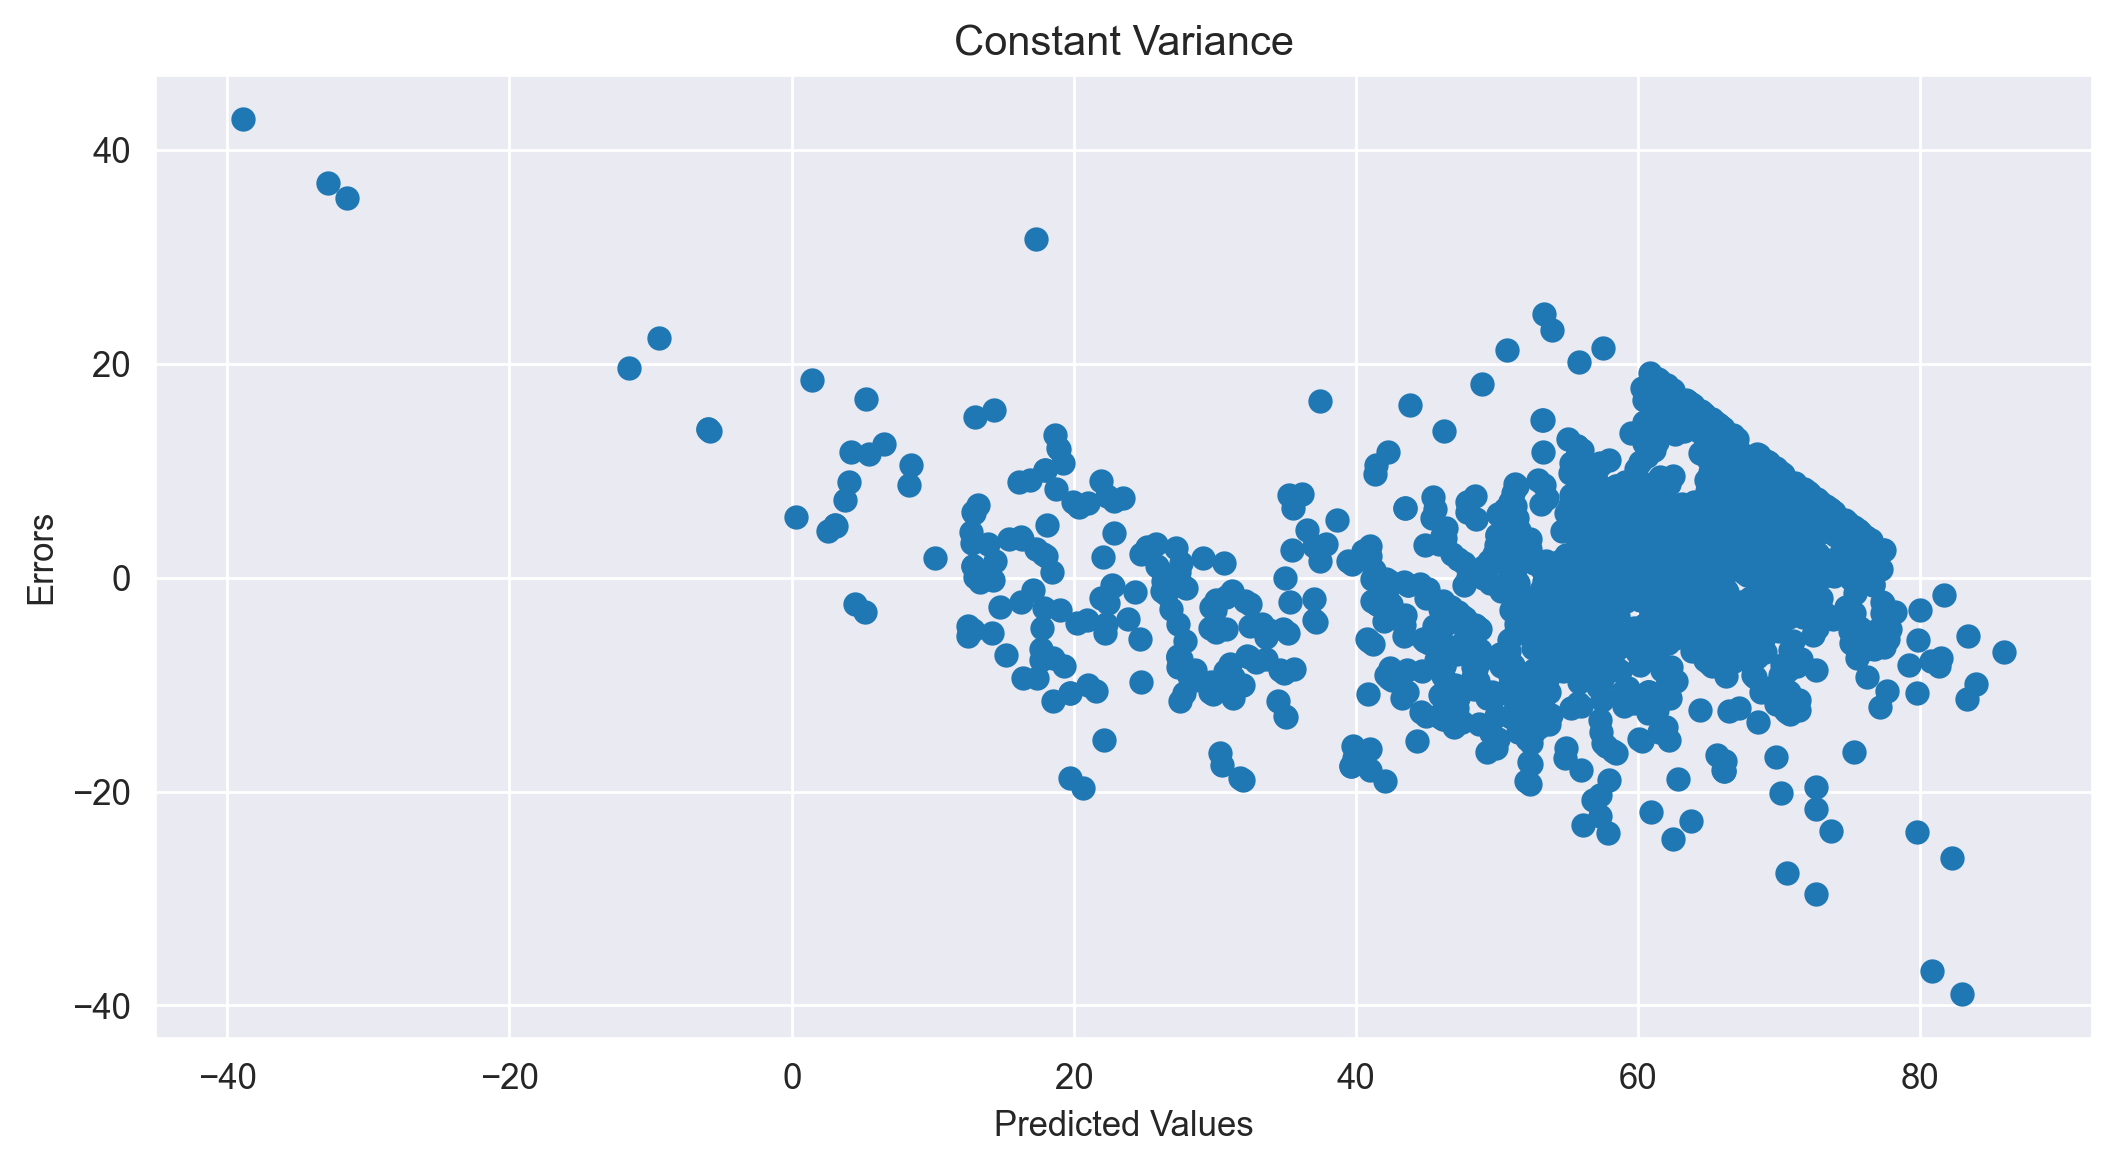

In [296]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Constant Variance')

# 3. Residual VS Regressor

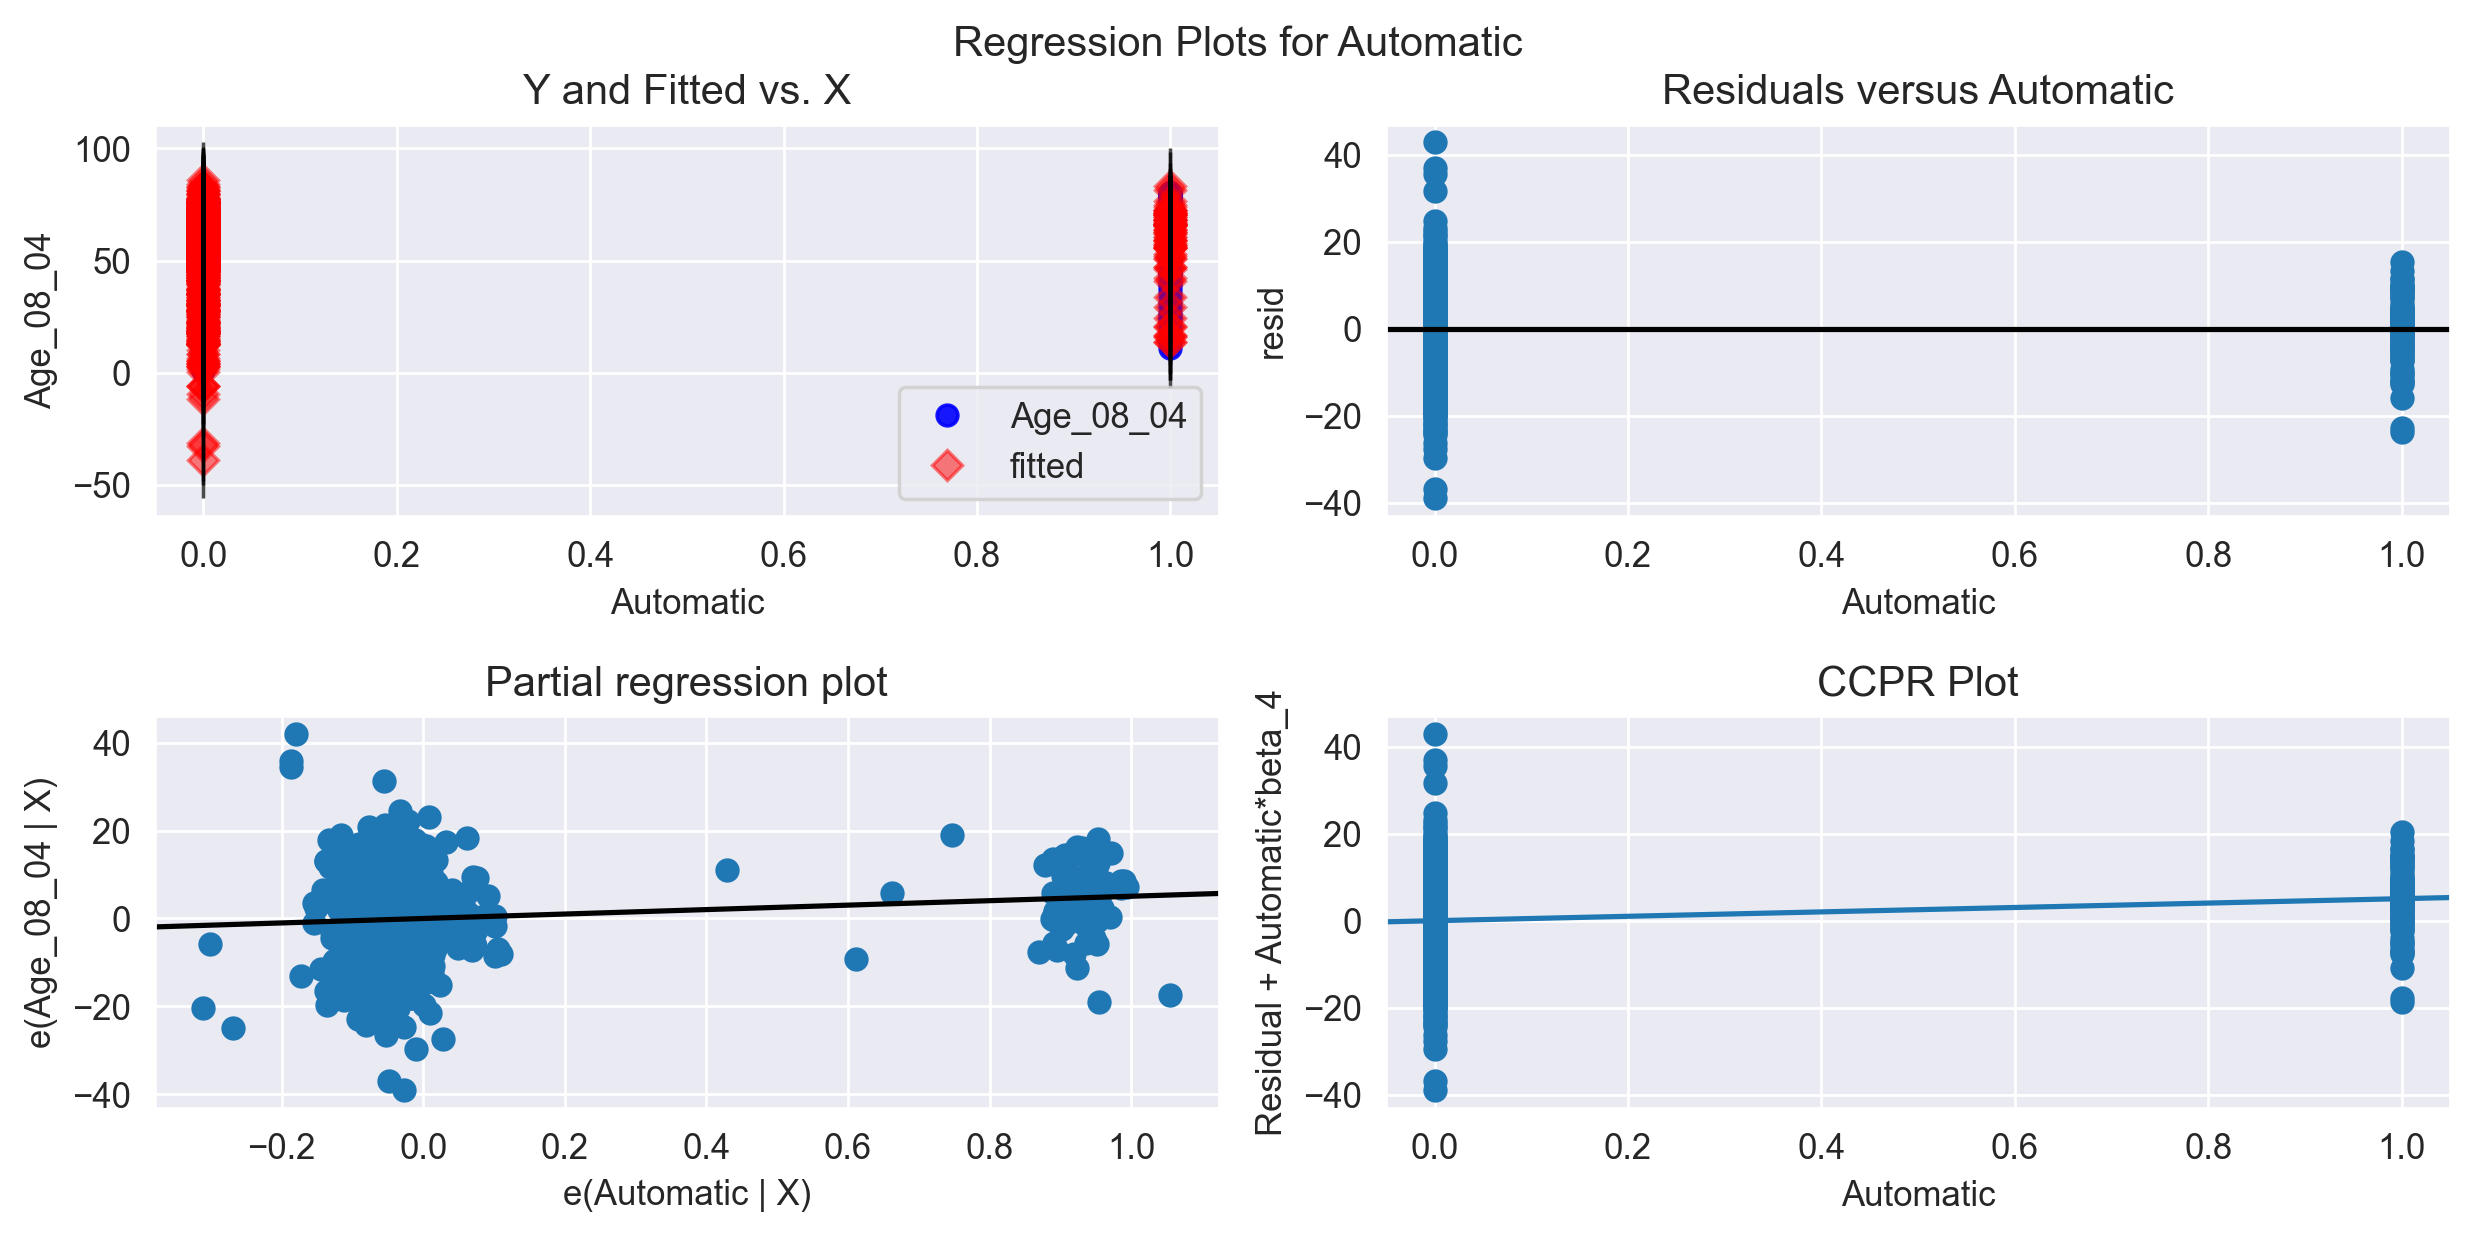

In [298]:
#Automatic
sm.graphics.plot_regress_exog(model,'Automatic');

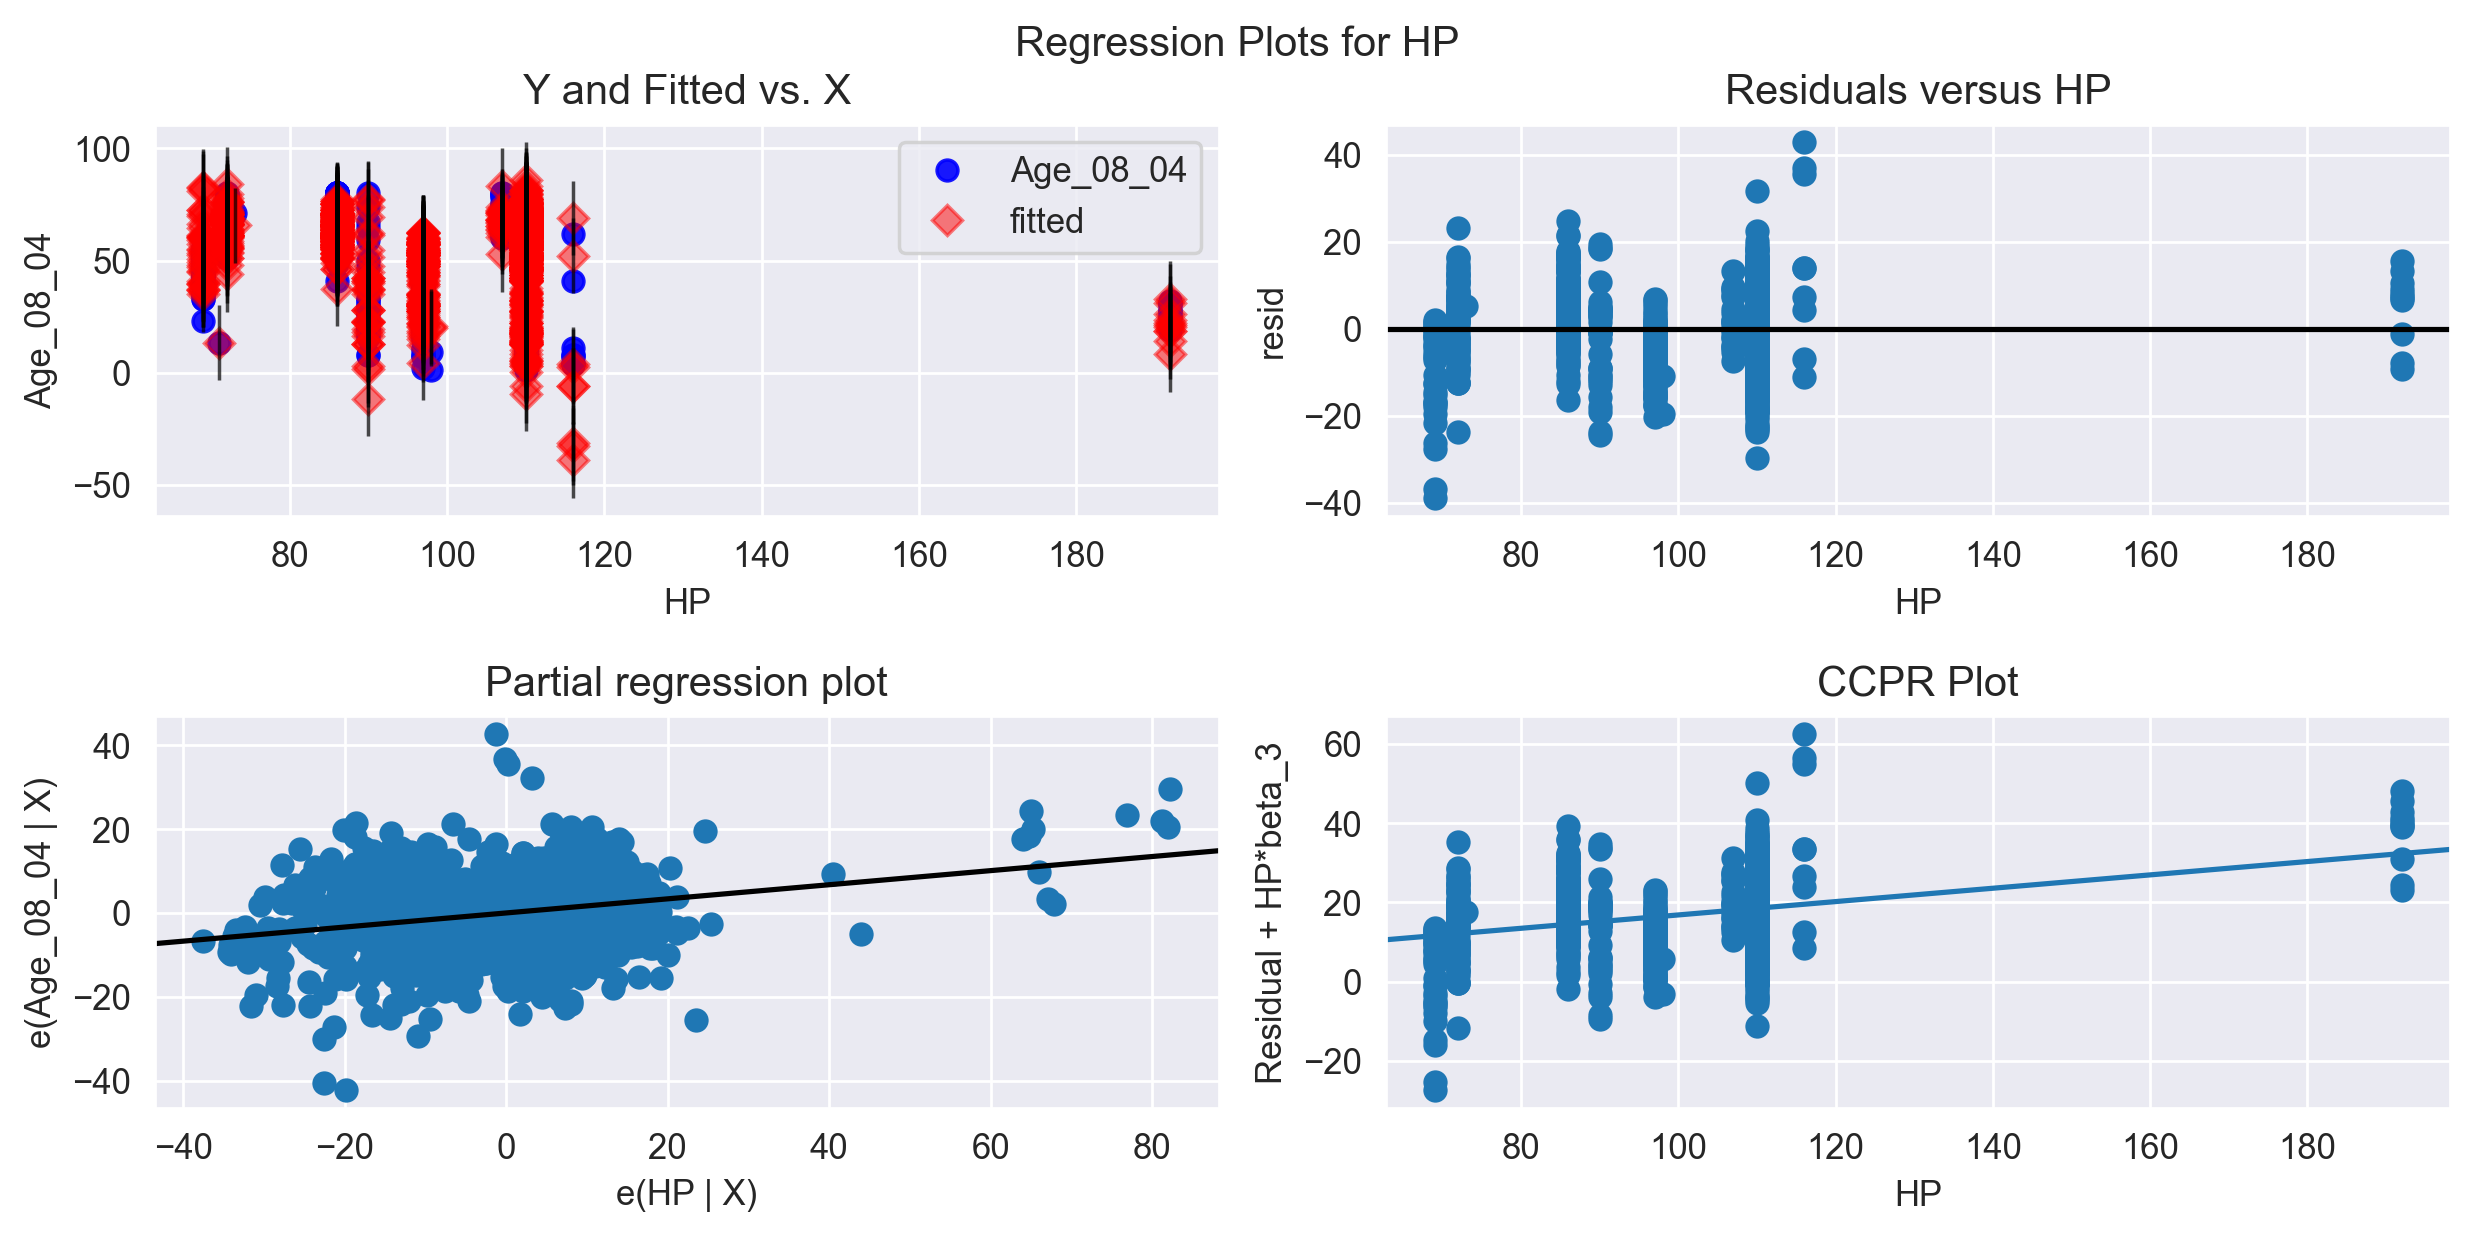

In [375]:
sm.graphics.plot_regress_exog(model,'HP');

# MODEL DELETION TECHNIQUES

In [ ]:
# Cook's Distance

In [ ]:
# detecting influencers and outlirs

In [418]:
model

In [420]:
#find the influence data
inf = model.get_influence()

In [422]:
#calculate the cooks distance
c,p = inf.cooks_distance

In [424]:
c

array([3.44269773e-03, 2.57825682e-03, 2.41524079e-03, ...,
       6.32796198e-04, 2.73873160e-05, 1.40451084e-06])

Text(0, 0.5, 'Cooks Distance')

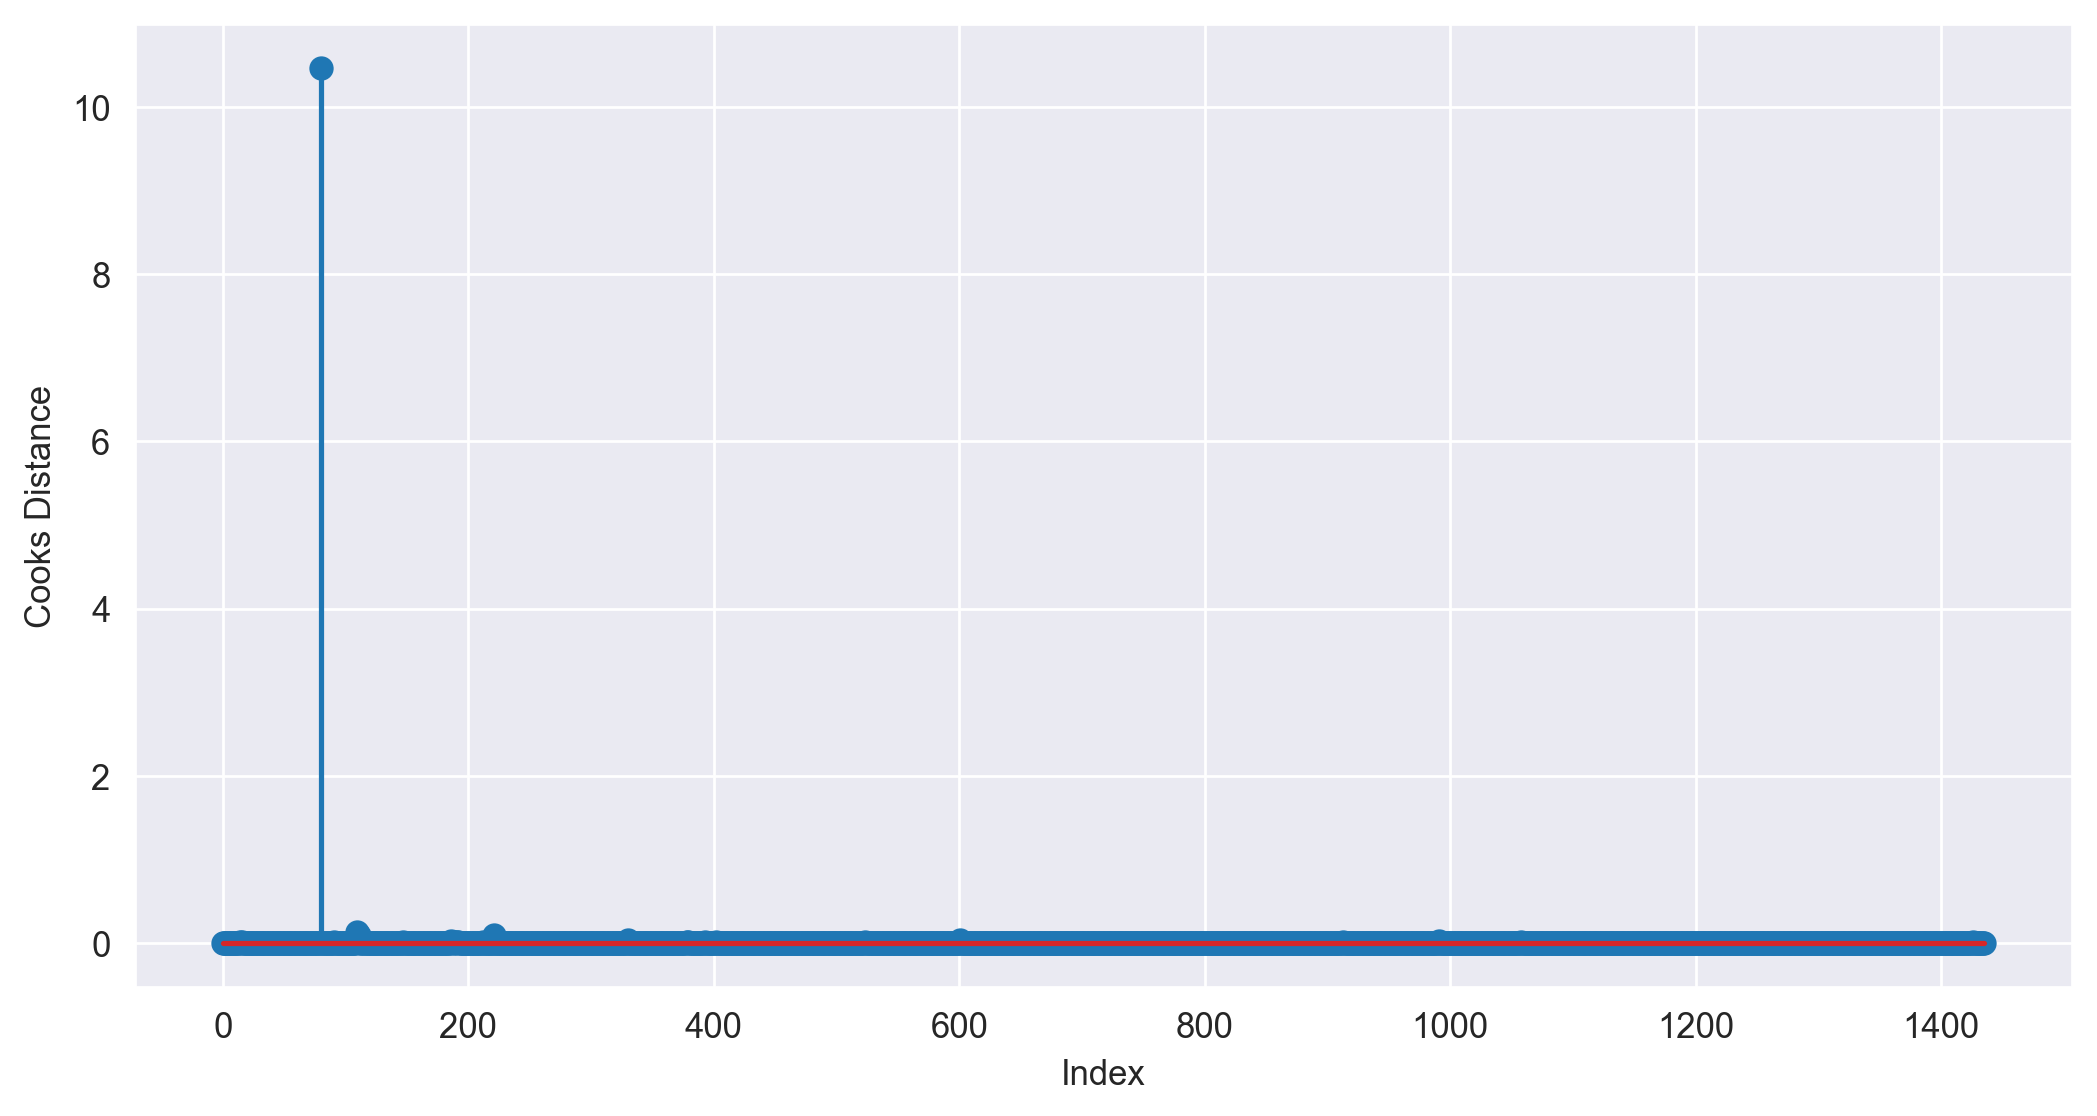

In [426]:
# cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [428]:
np.argmax(c), np.max(c)

(80, 10.467297520193306)

In [430]:
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [432]:
df.iloc[[80]]

Price  Age_08_04     KM Fuel_Type   HP  Automatic     cc  Doors  \
80  18950         25  20019    Petrol  110          1  16000      5   

    Cylinders  Gears  Weight  
80          4      5    1180

# Improving the model

In [435]:
df.drop(index=80,inplace=True)

In [437]:
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1435 rows x 11 columns]

In [ ]:
#reset the index

In [439]:
df.reset_index(inplace=True)

In [441]:
df

index  Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0         0  13500         23  46986    Diesel   90          0  2000      3   
1         1  13750         23  72937    Diesel   90          0  2000      3   
2         2  13950         24  41711    Diesel   90          0  2000      3   
3         3  14950         26  48000    Diesel   90          0  2000      3   
4         4  13750         30  38500    Diesel   90          0  2000      3   
...     ...    ...        ...    ...       ...  ...        ...   ...    ...   
1430   1431   7500         69  20544    Petrol   86          0  1300      3   
1431   1432  10845         72  19000    Petrol   86          0  1300      3   
1432   1433   8500         71  17016    Petrol   86          0  1300      3   
1433   1434   7250         70  16916    Petrol   86          0  1300      3   
1434   1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1430          4      5    1025  
1431          4      5    1015  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1114  

[1435 rows x 12 columns]

In [443]:
df.drop(columns=['index'], inplace=True)

In [445]:
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1430   7500         69  20544    Petrol   86          0  1300      3   
1431  10845         72  19000    Petrol   86          0  1300      3   
1432   8500         71  17016    Petrol   86          0  1300      3   
1433   7250         70  16916    Petrol   86          0  1300      3   
1434   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1430          4      5    1025  
1431          4      5    1015  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1114  

[1435 rows x 11 columns]

In [453]:
final_model=smf.ols('Age_08_04~Price+KM+HP+Automatic+cc+Doors+Cylinders+Gears',data=df).fit()

In [455]:
final_model.rsquared

0.7899362974475707

In [ ]:
#Since the value is<1, we can stop the diagnostic process and finalize the model

In [ ]:
#Predicting for new records

In [457]:
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [ ]:
test = pd.DataFrame({
    'HP' : [90,53.62,95,85,65],
    'KM' : [24530,30636,54175,72348,60058],
    'Weight' : [1162,1172,1150,1110,1200],
})
test

In [459]:
final_model.params

Intercept     4.138501
Price        -0.004617
KM            0.000021
HP            0.164504
Automatic     5.387970
cc           -0.000294
Doors         0.295462
Cylinders    16.554003
Gears         3.172464
dtype: float64

# Interview Questions:

In [ ]:
#1.What is Normalization & Standardization and how is it helpful?
Answer:Normalization and standardization are techniques used to adjust the scale of data features to improve the performance of machine learning algorithms.
Normalization:

Normalization transforms data into a specific range, usually [0, 1] or [-1, 1].
It is helpful when you need to ensure that all features contribute equally to the model, especially when using algorithms that are sensitive to the scale of the data, such as k-nearest neighbors (KNN) or neural networks.

Standardization:

Standardization transforms data to have a mean of 0 and a standard deviation of 1.
 It is helpful when you want to compare data that follows a normal distribution. Standardization is commonly used in algorithms like linear regression, logistic regression, and principal component analysis (PCA).

How is it helpful?

Improves Model Convergence: Many machine learning algorithms converge faster when the data is on a similar scale.
Prevents Bias: Normalization and standardization prevent features with larger scales from dominating the model.
Enhances Performance: They can improve the accuracy and efficiency of algorithms that are distance-based or use gradients (e.g., gradient descent).


In [ ]:
# 2.What techniques can be used to address multicollinearity in multiple linear regression?
Answer:
Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, leading to unreliable coefficient estimates and inflated standard errors. Here are several techniques to address multicollinearity:

Remove Highly Correlated Predictors:

Identify and remove one of the highly correlated variables. You can use correlation matrices or variance inflation factor (VIF) scores to detect high correlations.
Combine Correlated Variables:

Combine correlated variables into a single predictor. For example, you can create an average of related predictors or use principal component analysis (PCA) to reduce dimensionality.
Use Regularization Techniques:

Ridge Regression: Adds a penalty to the regression coefficients to shrink them, effectively handling multicollinearity.
LASSO Regression (Least Absolute Shrinkage and Selection Operator): Adds a penalty that can shrink some coefficients to zero, effectively performing feature selection.
Centering Variables:

Subtract the mean of each predictor from the predictor values. This can help reduce multicollinearity when polynomial terms are included in the regression.
Obtain More Data:

Increasing the sample size can sometimes help reduce multicollinearity, although this is not always feasible.
Remove Redundant Predictors Using Domain Knowledge:

Use domain expertise to identify and remove predictors that do not contribute much to the model's prediction but are highly correlated with other predictors.
    